# Shifting Example

This notebook shows how to use the shifting option on PMFTXYZ to get high resolution views of PMFT features that are not centered.

In [1]:
import numpy as np
import freud

from scipy.interpolate import griddata
from scipy.interpolate import RegularGridInterpolator

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt

First we load in our data. The particles used here are implemented with a simple Weeks-Chandler-Andersen isotropic pair potential, so particle orientation is not meaningful.

In [2]:
pos_data = np.load('data/XYZ/positions.npy')
box_data = np.load('data/XYZ/boxes.npy')

We calculate the PMFT the same way as shown in other examples first

In [3]:
window = 2**(1/6) # The size of the pmft calculation

bins = 100
pmft = freud.pmft.PMFTXYZ(x_max=window, y_max=window, z_max=window, bins=bins)

# This data is for isotropic particles, so we will just make some unit quaternions
# to use as the orientations
quats = np.zeros((pos_data.shape[1],4)).astype(np.float32)
quats[:,0] = 1

for i in range(10, pos_data.shape[0]):
    box = box_data[i]
    points = pos_data[i]
    pmft.compute((box, points), quats, reset=False)

unshifted = pmft.pmft

x, y, z = pmft.bin_centers

When we plot a centered slice of the XYZ pmft, we see that a number of wells are present at some distance from the origin

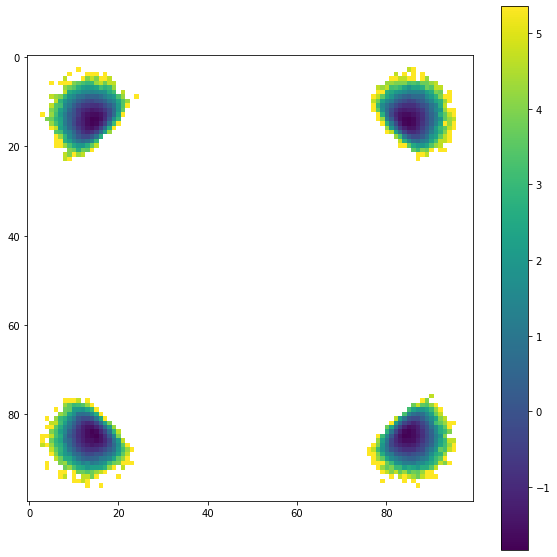

In [4]:
%matplotlib inline

plt.figure(figsize=(10,10))
plt.imshow(unshifted[int(bins/2),:,:])
plt.colorbar()
plt.show()

If we want a closer look at the details of those wells, then we could increase the PMFT resolution. But this will increase the computational cost by a lot, and we are wasting a big percentage of the pixels.

This use case is why the shiftvec argument was implemented. Now we will do the same calculation, but we will use a much smaller window centered on on of the wells.

To do this we need to pass a vector into the PMFTXYZ construction. The window will be centered on this vector.

In [5]:
shiftvec = [0.82, 0.82, 0]

window = 2**(1/6)/6 # Smaller window for the shifted case

bins = 50

pmft = freud.pmft.PMFTXYZ(x_max=window, y_max=window, z_max=window,
                          bins=50, shiftvec=shiftvec)

# This data is for isotropic particles, so we will just make some unit quaternions
# to use as the orientations
quats = np.array([[1, 0, 0, 0]] * pos_data.shape[1])

for i in range(10, pos_data.shape[0]):
    box = box_data[i]
    points = pos_data[i]
    pmft.compute((box, points), quats, reset=False)

shifted = pmft.pmft

x, y, z = pmft.bin_centers

Now the PMFT is a high resolution close up of one of the bonding wells. Note that as you increase the sampling resolution, you need to increase your number of samples because there is less averaging in each bin

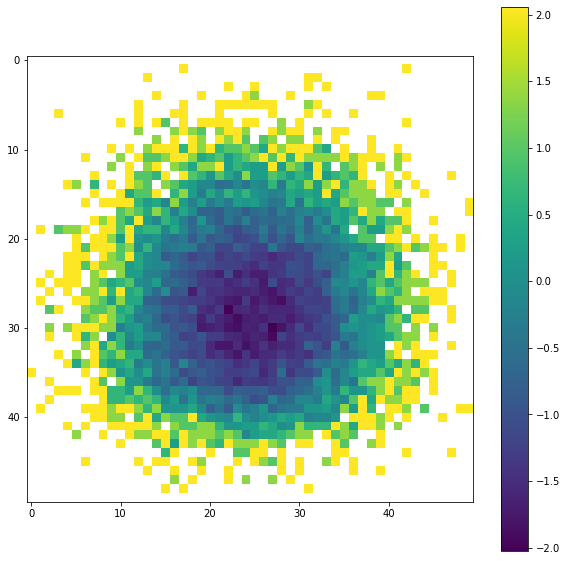

In [6]:
%matplotlib inline
plt.figure(figsize=(10, 10))
plt.imshow(shifted[int(bins/2), :, :])
plt.colorbar()
plt.show()